## Переопределенные системы линейных уравнений
### Метод наименьших квадратов

Цыбулин Иван ([tsybulin@crec.mipt.ru](mailto:tsybulin@crec.mipt.ru))

### Задача регрессии

Пусть дано множество измерений $(x_i, y_i)$, которые должны описываться зависимостью
$$
y = a x + b
$$
при некоторых фиксированных параметрах $a, b$. Требуется определить эти параметры.

Составим систему из $n$ уравнений.
$$
y_i = a x_i + b, \qquad i = 1,\dots, n
$$
Что является неизвестными в ней? Сколько всего здесь неизвестных?

## Переопределенные системы
Запишем систему уравнений в матричном виде
$$
\begin{pmatrix}
x_1 & 1\\
x_2 & 1\\
\vdots & \vdots\\
x_n & 1
\end{pmatrix}
\begin{pmatrix}
a\\b
\end{pmatrix} = 
\begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{pmatrix}
$$
В общем случае данная система не имеет решений. Задача требует *регуляризации*.

## Регуляризация
Пусть дана система
$$
\mathbf{Ax} = \mathbf {f},
$$
которая не имеет решения. Найдем такой вектор $\mathbf{x}$, при котором система имеет минимальную невязку:
$$
\|\mathbf f - \mathbf {Ax}\| \to \min_{\mathbf x}.
$$
Решение этой задачи уже существует всегда. Если исходная система была разрешима, очевидно, что решения обеих задач совпадут.

## Метод наименьших квадратов
Рассмотрим евклидову норму невязки
$$
\|\mathbf f - \mathbf {Ax}\|^2_E = (\mathbf f - \mathbf {Ax}, \mathbf f - \mathbf {Ax}) = 
\|\mathbf f\|^2 - 2 (\mathbf {Ax}, \mathbf f) + \mathbf{x}^\top \mathbf{A}^\top \mathbf{Ax}
\to \min_{\mathbf x}.
$$
Минимум достигается на решении системы
$$
\mathbf{A}^\top \mathbf {A x} = \mathbf A^\top \mathbf f \qquad \Leftrightarrow \qquad 
\mathbf A^\top (\mathbf f - \mathbf {Ax}) = 0
$$
Исходная система была умножена слева на $\mathbf A^\top$. При этом матрица системы стала квадратной, симметричной и положительно определенной.

### Обобщенный МНК

Разные компоненты вектора невязки могут иметь различный *вес*. Например, какие-то измерения были проведены точнее других. В этом случае можно Вместо Евклидовой нормы $||\mathbf r||_E$ минимизировать норму
$$
||\mathbf r||_{\mathbf B} \equiv \sqrt{\mathbf r^\top \mathbf B\mathbf r},
$$
где симметричная положительно определенная матрица $\mathbf B$ задает веса отдельных уравнений (диагональные элементы) и связи между различными уравнениями (внедиагональные элементы)

Применяя обобщенный метод наименьших квадратов к переопределенной системе
$$
\mathbf {Ax} = \mathbf f
$$
и аналогичным образом минимизируя $\|\mathbf r\|_{\mathbf B}$, сводим задачу к решению системы
$$
\mathbf A^\top \mathbf B \mathbf A \mathbf x = \mathbf A^\top \mathbf B \mathbf f
$$

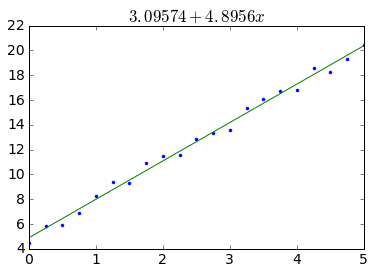

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 14})

x = np.linspace(0, 5, 21)
y = 3*x+5 + 0.5*np.random.randn(len(x))
A = np.zeros((len(x), 2))
A[:, 0] = x
A[:, 1] = 1
f = y
a,b = np.linalg.solve(A.T.dot(A), A.T.dot(f))
plt.plot(x, y, '.')
plt.plot(x, a*x+b, '-')
plt.title('$%g + %g x$' % (a,b))
plt.show()

## Более сложная регрессия
Пусть данные описываются более сложной зависимостью. Например,
$$
y = a + b x + c x^2.
$$
Здесь имеется 3 неизвестных параметра $a,b,c$. Составим матрицу системы
$$
\begin{pmatrix}
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2\\
&&\vdots\\
1 & x_n & x_n^2
\end{pmatrix}
\begin{pmatrix}
a\\b\\c
\end{pmatrix} = 
\begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{pmatrix}
$$
И найдем решение методом наименьших квадратов

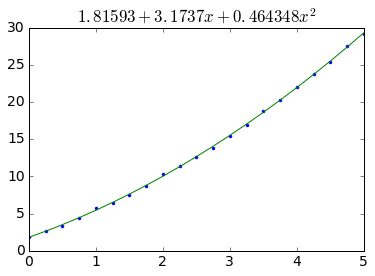

In [2]:
n = 21
x = np.linspace(0, 5, n)
y = 2 + 3 * x + 0.5 * x**2 + 0.2 * np.random.randn(len(x))
A = np.zeros((n, 3))
A[:, 0] = 1
A[:, 1] = x
A[:, 2] = x**2
f = y
a,b,c = np.linalg.solve(A.T.dot(A), A.T.dot(f))
plt.plot(x, y, '.')
plt.plot(x, a+b*x+c*x**2, '-')
plt.title('$%g + %g x + %g x^2$' % (a,b,c))
plt.show()

## Приближение функций в смысле МНК
Пусть задана функция $f(x)$ и требуется построить ее наилучшее приближение вида
$$
P_n(x) = c_0 + c_1 x + \dots + c_n x^n.
$$
Неизвестными являются $c_0, \dots, c_n$. В каком смысле понимается наилучшее приближение? Например, по норме $L_2$:
$$
\int_{a}^b |f(x) - P_n(x)|^2 dx \to \min_{c_0, \dots, c_n}
$$

Найдем минимум по $c_0, c_n$, продифференцировав
$$
\epsilon = \int_{a}^b |f(x) - P_n(x)|^2 dx = \int_a^b \left(f(x) - \sum_k c_k x^k\right)^2 dx\\
\frac{\partial \epsilon}{\partial c_i} = 2 \int_a^b \left(f(x) - \sum_k c_k x^k\right) x^i dx
= 2 \left[(f, x^i) - \sum_k c_k (x^k, x^i)\right] = 0\\
$$

Таким образом, задача сводится к решению системы
$$
\mathbf \Gamma \mathbf{c} = \mathbf g,
$$
где
$$
\Gamma_{ik} = (x^k, x^i) = \int_a^b x^k x^i dx = \int_a^b x^{i+k} dx\\
g_i = (f, x^i) = \int_a^b f(x) x^i dx
$$

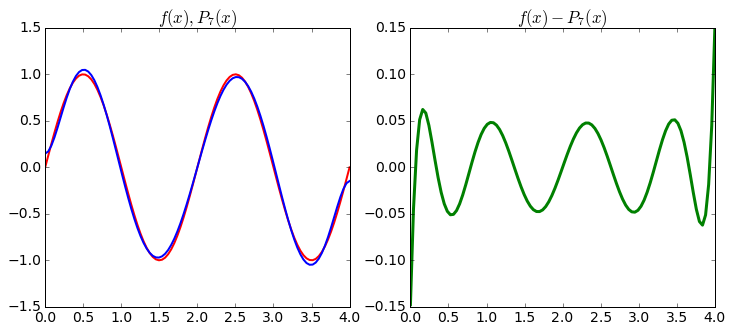

In [3]:
from scipy.integrate import quad
a = 0; b = 4; n = 8
def func(x): return np.sin(np.pi * x)
G = np.zeros((n, n))
g = np.zeros(n)
for i in range(n):
    for k in range(n):
        G[i, k], _ = quad(lambda x: x**(i+k), a, b)
    g[i], _ = quad(lambda x: x**i * func(x), a, b)

c = np.linalg.solve(G, g)
X = np.linspace(a, b, 100)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
ax.plot(X, func(X), 'r', lw=2)
ax.plot(X, np.array([c[i]*X**i for i in range(n)]).sum(axis=0), 'b', lw=2)
ax.set_title('$f(x), P_{%d}(x)$' % (n-1))
ax = fig.add_subplot(122)
ax.plot(X, func(X) - np.array([c[i]*X**i for i in range(n)]).sum(axis=0), 'g', lw=3)
ax.set_title('$f(x) - P_{%d}(x)$' % (n-1))
plt.show()

### Выбор базиса
С точки зрения линейной алгебры нет разницы, по каким функциям раскладывать многочлен $P(x)$. Это могут быть $1, x, x^2, \dots$ или же любое семейство многочленов. Однако, выбор базиса влияет на полученную линейную систему для определения коэффициентов разложения. Для определенности возьмем $[a,b] = [0,1]$.

$$
\Gamma_{ik} = \int_0^1 x^{i+k} dx = \frac{1}{i+k+1}.
$$
Эта матрица называется матрицей Гильберта и является классическим примером плохо обусловленной матрицы

In [4]:
from scipy.linalg import hilbert, svdvals
def cond2(A):
    s = svdvals(A);
    return s[0] / s[-1]
for n in range(5, 31, 5):
    H = hilbert(n)
    print('n = %d, mu_2(H_n) = %e' % (n, cond2(H)))

n = 5, mu_2(H_n) = 4.766073e+05
n = 10, mu_2(H_n) = 1.602447e+13
n = 15, mu_2(H_n) = 2.777622e+17
n = 20, mu_2(H_n) = 1.495701e+18
n = 25, mu_2(H_n) = 2.805899e+18
n = 30, mu_2(H_n) = 2.430912e+19


### Ортогональные многочлены
Оказывается, можно выбрать такой базис из многочленов, что матрица $\mathbf \Gamma$ будет диагональной!
Для этого требуется построить такое семейство многочленов $\left\{P_k(x)\right\}_{k=1}^n$, что
$$
(P_k, P_m) = \int_a^b P_k(x) P_m(x) dx = \begin{cases}
0, &k \neq m\\
\star, &k = m
\end{cases}
$$
Такое семейство многочленов называется ортогональным.

Для отрезка $[a,b] = [-1,1]$ ортогональными многочленами будут многочлены Лежандра
$$
P_0(x) = 1,\; P_1(x) = x,\; P_2(x) = \frac{3x^2-1}{2}, \dots\\
P_{k+1} = \frac{2k+1}{k+1} xP_k(x) - \frac{k}{k+1} P_{k-1}(x)\\
(P_k, P_m) = \int_{-1}^1 P_k(x) P_m(x) dx = \begin{cases}
0, &k \neq m\\
\frac{2}{2k+1}, &k = m
\end{cases}
$$

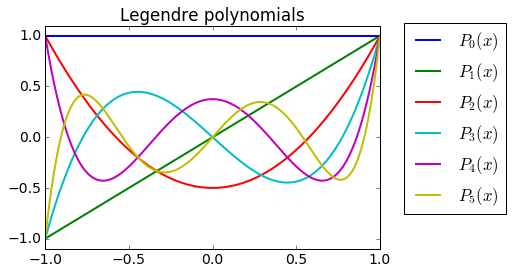

In [5]:
from scipy.special import legendre
x = np.linspace(-1, 1, 1000)
for k in range(6):
    plt.plot(x, legendre(k)(x), label='$P_{%d}(x)$' % k, lw=2)
plt.title('Legendre polynomials')
plt.ylim(-1.1, 1.1)
plt.legend(bbox_to_anchor=(1.4, 1.05))
plt.show()

Ортогональные мнгочлены существенно упрощают приближение функции в смысле МНК. В этом случае коэффициенты разложения находятся явно
$$
f(x) \approx \sum_{k=0}^n c_k P_k(x)\\
\Gamma_{ik} = \int_a^b P_k(x) P_m(x) dx = \begin{cases}
0, &k \neq m\\
\int_a^b P_k(x)^2dx, &k = m
\end{cases}\\
c_k = \frac{(f, P_k)}{(P_k, P_k)} =  \frac{1}{\int_a^b P_k(x)^2dx} \int_a^b f(x) P_k(x) dx
$$

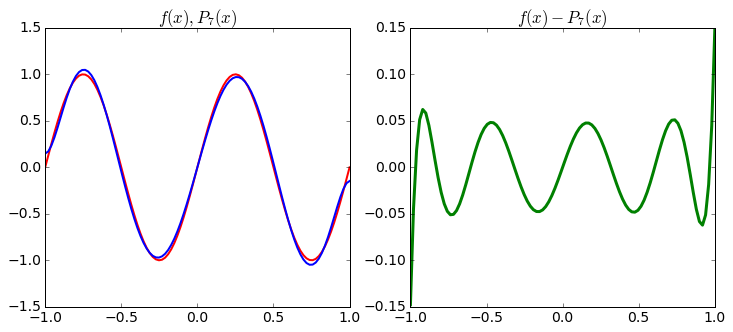

In [6]:
a = -1; b = 1; n = 8
def func(x): return np.sin(2 * np.pi * x)
g = np.zeros(n)
A = np.zeros(n)
for k in range(n):
    g[k], _ = quad(lambda x: legendre(k)(x) * func(x), a, b)
    A[k] = 2 / (2*k+1)
c = g / A
X = np.linspace(a, b, 100)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
ax.plot(X, func(X), 'r', lw=2)
ax.plot(X, np.array([c[i]*legendre(i)(X) for i in range(n)]).sum(axis=0), 'b', lw=2)
ax.set_title('$f(x), P_{%d}(x)$' % (n-1))
ax = fig.add_subplot(122)
ax.plot(X, func(X) - np.array([c[i]*legendre(i)(X) for i in range(n)]).sum(axis=0), 'g', lw=3)
ax.set_title('$f(x) - P_{%d}(x)$' % (n-1))
plt.show()

### Наилушее приближение в других нормах
Минимизация ошибки в норме $L_2$ имеет существенный недостаток &mdash; максимальное отклонение сосредоточено у краев отрезка, а не рассредоточено равномерно по отрезку.

Данного недостатка лишено приближение в норме 
$$
(f, g) = \int_{a}^{b} \frac{f(x) g(x)}{\sqrt{(x-a)(b-x)}} dx
$$

Для данной нормы соответствующим ортогональным семейством будут многочлены Чебышева $T_n(x)$:
$$
T_0(x) = 1,;\
T_1(x) = x,;\
T_2(x) = 2x^2-1,\dots\\
T_n(x) = \cos n \arccos x\\
\int_{-1}^1 \frac{T_k(x) T_m(x) dx}{\sqrt{1-x^2}} = \begin{cases}
0, & m \neq k\\
\pi, & m = k = 0\\
\pi/2, & m=k\neq 0
\end{cases}
$$

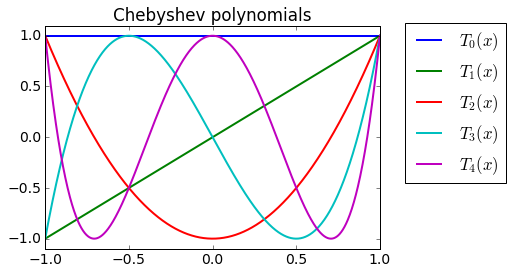

In [7]:
from scipy.special import chebyt
x = np.linspace(-1, 1, 1000)
for k in range(5):
    plt.plot(x, chebyt(k)(x), label='$T_{%d}(x)$' % k, lw=2)
plt.title('Chebyshev polynomials')
plt.legend(bbox_to_anchor=(1.4, 1.05))
plt.ylim(-1.1, 1.1)
plt.show()

В этом случае коэффициенты разложения вычисляются по той же формуле
$$
c_k = \frac{(f, P_k)}{(P_k, P_k)},
$$
то есть
$$
c_0 = \frac{1}{\pi} \int_{-1}^1 \frac{f(x)T_0(x)}{1-x^2} dx = \frac{1}{\pi} \int_{-1}^1 \frac{f(x)}{1-x^2} dx\\
c_k = \frac{2}{\pi} \int_{-1}^1 \frac{f(x)T_k(x)}{1-x^2} dx = \frac{2}{\pi} \int_{-1}^1 \frac{f(x) \cos k \arccos x}{1-x^2} dx
$$

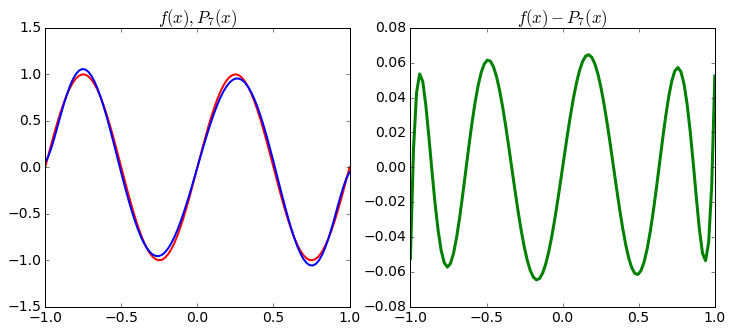

In [8]:
a = -1; b = 1; n = 8
def func(x): return np.sin(2 * np.pi * x)
g = np.zeros(n)
A = np.zeros(n)
for k in range(n):
    g[k], _ = quad(lambda x: chebyt(k)(x) * func(x) / np.sqrt(1 - x**2), a, b)
    A[k] = np.pi / 2 if k > 0 else np.pi
c = g / A
X = np.linspace(a, b, 100)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
ax.plot(X, func(X), 'r', lw=2)
ax.plot(X, np.array([c[i]*chebyt(i)(X) for i in range(n)]).sum(axis=0), 'b', lw=2)
ax.set_title('$f(x), P_{%d}(x)$' % (n-1))
ax = fig.add_subplot(122)
ax.plot(X, func(X) - np.array([c[i]*chebyt(i)(X) for i in range(n)]).sum(axis=0), 'g', lw=3)
ax.set_title('$f(x) - P_{%d}(x)$' % (n-1))
plt.show()